In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Add the parent directory of 'src' to the Python path
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Longman phrase and anki deck generation
A more memorable way to learn the core vocabulary as defined in Longman Communications vocab lists, we take the vocab and use an LLM
to generate phrases using it.

## Longman 1000, 2000 and 3000 already provided
Enlish phrases for the longman vocab have already been created and can be found in the 'data' folder

In [32]:
from src.utils import get_longman_verb_vocab_dict
from src.phrase import generate_phrases_from_vocab_dict

file_path = '../data/longman-communication-3000.json'
vocab_dict = get_longman_verb_vocab_dict(file_path, "S3") #S1 = 1st 1000 words used in Speech, options are S1-3 and W1-3

In [ ]:
#uses LLM calls - it sometimes generates phrases terminated too early (e.g. Mind the pot on the), so advise you scan through and check

#english phrases only initially
longman_phrases = generate_phrases_from_vocab_dict(vocab_dict, max_iterations=15)

In [ ]:
with open("../outputs/longman/longman_1000_phrases.txt", "w", encoding="utf-8") as f:
    for phrase in longman_phrases:
        f.write(phrase + "\n")

## Create an Anki deck from thoses phrases

Or, load one of the english Longman phrase lists in data/ already created and apply to your language

This function:
1. translates
2. generates audio using text to speech
3. packages up the text and audio into several anki decks (in batches), that can be imported into Anki.

The deck_name will is used to derive the deck_id and so despite there being several *.apkg files created, these will all merge successfully into the same deck


In [ ]:

from src.anki_tools import create_anki_deck_from_english_phrase_list, export_to_anki_with_images
from src.generate import ( 
    add_practice_phrases,
    create_story_plan_and_dialogue,
    add_translations,
    add_audio,
    create_album_files)

from src.utils import add_image_paths, test_image_reading



In [ ]:

_ = await create_anki_deck_from_english_phrase_list(example_phrases, deck_name="Longman 1000 - Basque", anki_filename_prefix="longman_1000_basque", batch_size=50)

## Get anki flash card data


In [51]:
from src.anki_tools import convert_anki_to_story_dict, print_deck_info
# Example usage
collection_path =r"C:\Users\i5\AppData\Roaming\Anki2\User 1\collection.anki2"  # Your Anki database path
deck_name = "Longman 1000 - Swedish"

# Convert the Anki deck to story_dict format
story_dict = convert_anki_to_story_dict(collection_path, deck_name)

In [73]:
from src.utils import create_test_story_dict


test_dict = create_test_story_dict(story_dict, 1, 2, 3)

In [75]:
test_phrases = []
for english, target in test_dict['part_1']['translated_phrase_list']:
    test_phrases.append(english)

In [77]:
test_phrases

['The kids love to sing in the rain',
 'We should thank dad for the useful advice']

# Generate Images

In [3]:
import base64
import hashlib
import io
import json
import os
import re
import subprocess
import sys
import time
from collections import defaultdict
from typing import Any, Dict, List, Literal, Optional, Set, Tuple

import numpy as np
import pycountry
import requests
import spacy
import vertexai
from anthropic import AnthropicVertex
from dotenv import load_dotenv
from PIL import Image
from pydub import AudioSegment
from reportlab.lib import colors
from reportlab.lib.enums import TA_LEFT
from reportlab.lib.pagesizes import letter
from reportlab.lib.styles import ParagraphStyle, getSampleStyleSheet
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.cidfonts import UnicodeCIDFont
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.platypus import Paragraph, SimpleDocTemplate, Spacer, Table, TableStyle
from vertexai.generative_models import HarmCategory, SafetySetting
from vertexai.preview.vision_models import ImageGenerationModel
from tqdm import tqdm
from src.config_loader import config


Found config file at: y:\Python Scripts\audio-language-trainer\src\config.json
Language name: Swedish determined from code sv
Successfully loaded config from: y:\Python Scripts\audio-language-trainer\src\config.json
Multiple country codes available for en: en-AU, en-GB, en-IN, en-US


In [ ]:

vertexai.init(project=config.PROJECT_ID, location=config.VERTEX_REGION)
generation_model = ImageGenerationModel.from_pretrained("imagen-3.0-fast-generate-001")
prompt = "a cute dog"
           # Generate the image
images = generation_model.generate_images(
    prompt=prompt,
    number_of_images=1,
    aspect_ratio="1:1",
    # person_generation="allow_adult",
    # safety_filter_level="block_fewest",
)

#images.images returns [] (no generation)
#len(images.images) # returns 1 if image generated
#(images.images[0]._image_bytes) -> image bytes


In [26]:
type(images.images[0]._image_bytes)

bytes

In [22]:
from src.utils import create_image_generation_prompt, generate_image_imagen, add_images_to_phrases, clean_filename, save_json, generate_image_stability
import time
from src.config_loader import config

#resp = create_image_generation_prompt("They chose to spend their holiday down south")



Config file has been modified. Reloading...
Language name: Swedish determined from code sv
Successfully loaded config from: y:\Python Scripts\audio-language-trainer\src\config.json
Multiple country codes available for en: en-AU, en-GB, en-IN, en-US


In [50]:
test_phrases = ["The kids love to sing in the rain",
"He will build a proper table for us",
"They chose to spend their holiday down south"]

In [51]:
result = add_images_to_phrases(test_phrases, output_dir="../data/longman_phrase_images")

Successfully processed: The kids love to sing in the rain
Successfully processed: He will build a proper table for us
Successfully processed: They chose to spend their holiday down south


In [49]:
image.save("local.png")

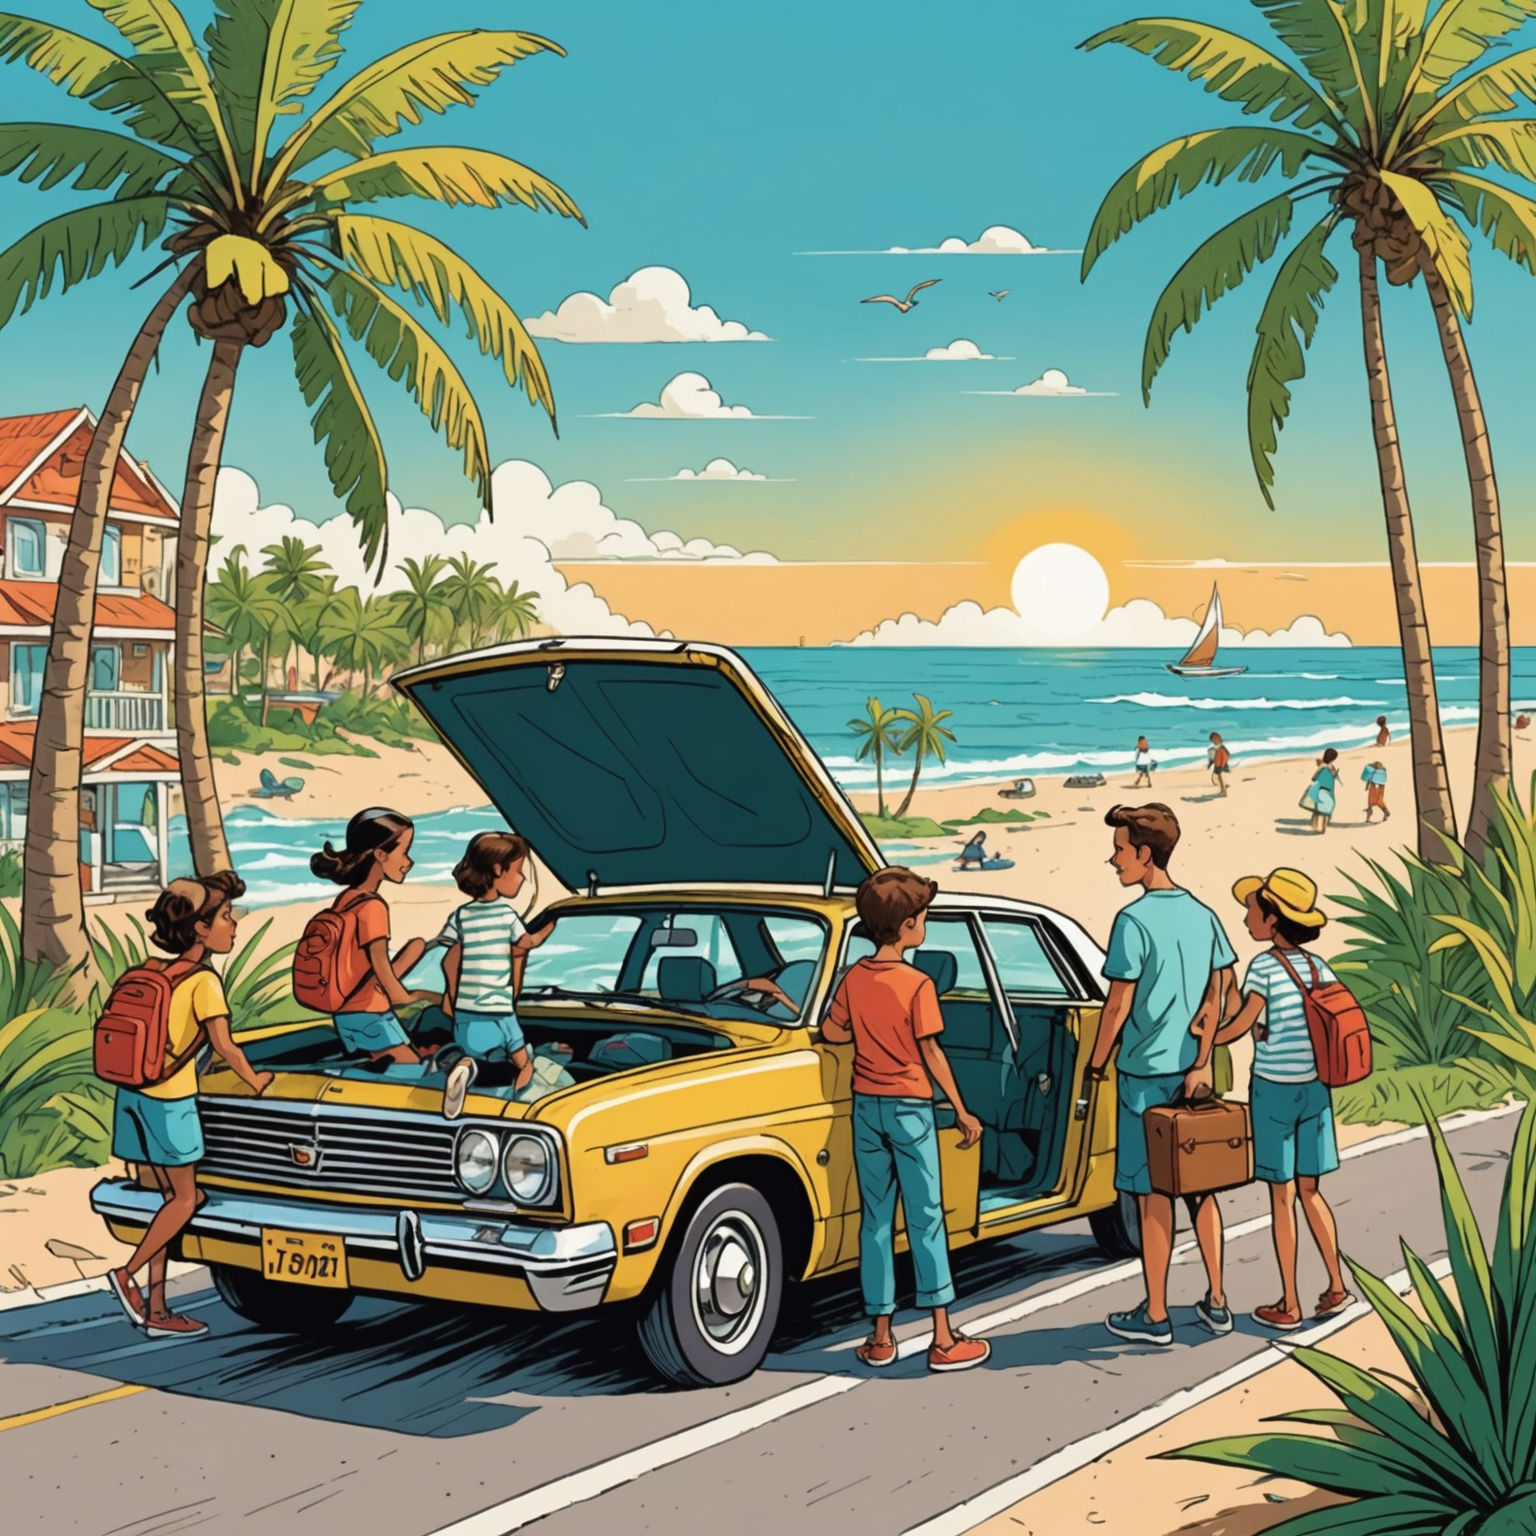

In [45]:
from PIL import Image
import io
from IPython.display import Image as IPyImage
from IPython.display import display


image = Image.open(io.BytesIO(stab_image))
display(image)

In [ ]:
image.save()

In [12]:
prompt = "A group of joyful small people singing and dancing in a heavy rainstorm, splashing in puddles, with musical notes floating around them. in the style of a children's book illustration, Axel Scheffler style, thick brushstrokes, colored pencil texture, expressive characters, bold outlines, textured shading, earthy color palette"
image = generate_image_imagen(resp)

Attempt 1 failed: "No image generated using imagen-3.0-generate-001 with prompt: A happy family packing suitcases into a car, with a map showing a route to a sunny beach destination in the south, palm trees visible in the distance. in the style of a children's book illustration, Axel Scheffler style, thick brushstrokes, colored pencil texture, expressive characters, bold outlines, textured shading, pastel color palette"
Waiting 10.0s before retry...
Attempt 2 failed: "No image generated using imagen-3.0-generate-001 with prompt: A happy family packing suitcases into a car, with a map showing a route to a sunny beach destination in the south, palm trees visible in the distance. in the style of a children's book illustration, Axel Scheffler style, thick brushstrokes, colored pencil texture, expressive characters, bold outlines, textured shading, pastel color palette"
Waiting 20.0s before retry...


Exception: Image generation failed after 3 attempts. Last error: "No image generated using imagen-3.0-generate-001 with prompt: A happy family packing suitcases into a car, with a map showing a route to a sunny beach destination in the south, palm trees visible in the distance. in the style of a children's book illustration, Axel Scheffler style, thick brushstrokes, colored pencil texture, expressive characters, bold outlines, textured shading, pastel color palette"

In [78]:
result = add_images_to_phrases(test_phrases, output_dir="../data/longman_phrase_images")

Attempt 1 failed: "No image generated using imagen-3.0-generate-001 with prompt: A group of joyful children singing and dancing in a heavy rainstorm, splashing in puddles, with musical notes floating around them. in the style of a children's book illustration, Axel Scheffler style, thick brushstrokes, colored pencil texture, expressive characters, bold outlines, textured shading, earthy color palette"
Waiting 10.0s before retry...
Attempt 2 failed: "No image generated using imagen-3.0-generate-001 with prompt: A group of joyful children singing and dancing in a heavy rainstorm, splashing in puddles, with musical notes floating around them. in the style of a children's book illustration, Axel Scheffler style, thick brushstrokes, colored pencil texture, expressive characters, bold outlines, textured shading, earthy color palette"
Waiting 20.0s before retry...
Error processing phrase 'The kids love to sing in the rain': Image generation failed after 3 attempts. Last error: "No image gener

In [79]:
save_json(result, "../data/longman_phrase_images/phrase_image_dict.json")